In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

Iris=datasets.load_iris()
df=pd.DataFrame(Iris.data,columns=Iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
x=df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(init="k-means++", n_clusters=i,n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

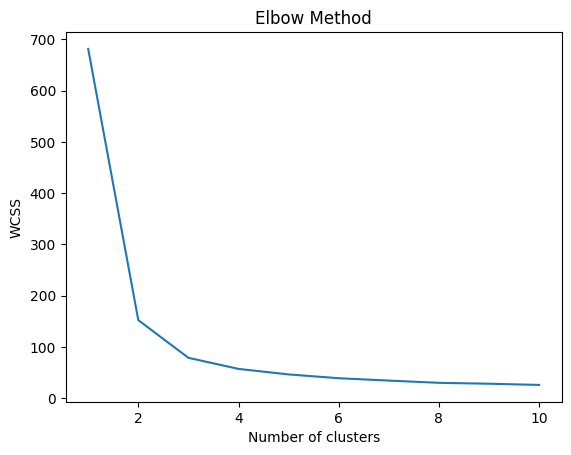

In [ ]:
plt.plot(range (1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

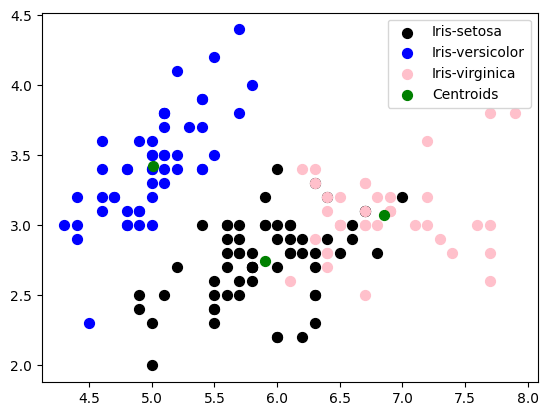

In [ ]:
kmeans=KMeans(init="k-means++",n_clusters=3, n_init=10, max_iter=300, random_state=0)
y=kmeans.fit_predict(x)

plt.scatter(x[y==0,0], x[y==0,1], c="black", s = 50,label="Iris-setosa")
plt.scatter(x[y==1,0], x[y==1,1], c="blue", s = 50 , label="Iris-versicolor")
plt.scatter(x[y==2,0], x[y==2,1], c="pink", s = 50,label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c="green",
s = 50,label="Centroids")

plt.legend()

Clustering Accuracy: 0.89


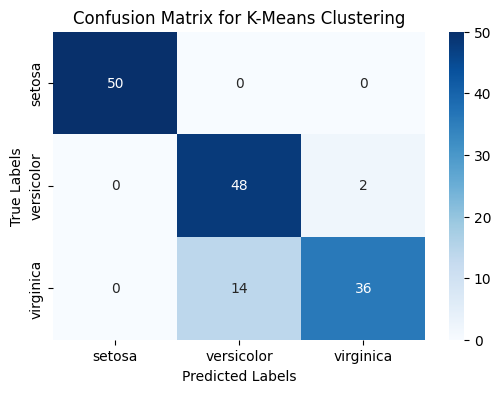

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
Iris = datasets.load_iris()
y_true = Iris.target 

from scipy.stats import mode

def map_clusters_to_labels(y_clusters, y_true):
    labels = np.zeros_like(y_clusters)
    for i in range(3):  
        mask = (y_clusters == i)
        labels[mask] = mode(y_true[mask])[0] 
    return labels

y_mapped = map_clusters_to_labels(y, y_true)

accuracy = accuracy_score(y_true, y_mapped)
print(f'Clustering Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_true, y_mapped)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=Iris.target_names, yticklabels=Iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Means Clustering")
plt.show()
